In [223]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Part 1-Clustering: Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [224]:
df = pd.read_excel('Clustering+Clean+Ads_Data.xlsx')

In [225]:
df.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [226]:
df.tail()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type Format  Available_Impressions  Matched_Queries  \
23061      Web      Mobile  Video                      1                1   
23062      Web     Desktop  Video                      3                2   
23063      App      Mobile  Video                      2                1   
23064    Video      Mobile  Video                      7                1   
23065      App      Mobile  Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue  CTR  CPM  CPC  
23061            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23062            2       1   0.04  0.35   0.0260  NaN  NaN  NaN  
23063            1       1   0.05  0.35   0.0325  NaN  NaN  NaN  
23064            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23065            2       1   0.09  0.35   0.0585  NaN  NaN  NaN

In [369]:
df.shape

(23066, 19)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [229]:
df.describe().T

count          mean           std         min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.0000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.0000   
Ad Size                23066.0  9.667447e+04  6.153833e+04  33600.0000   
Available_Impressions  23066.0  2.432044e+06  4.742888e+06      1.0000   
Matched_Queries        23066.0  1.295099e+06  2.512970e+06      1.0000   
Impressions            23066.0  1.241520e+06  2.429400e+06      1.0000   
Clicks                 23066.0  1.067852e+04  1.735341e+04      1.0000   
Spend                  23066.0  2.706626e+03  4.067927e+03      0.0000   
Fee                    23066.0  3.351231e-01  3.196322e-02      0.2100   
Revenue                23066.0  1.924252e+03  3.105238e+03      0.0000   
CTR                    18330.0  7.366054e-02  7.515992e-02      0.0001   
CPM                    18330.0  7.672045e+00  6.481391e+00      0.0000   
CPC                    18330.0  3.510606e-01  3.433338e-01      0.0000   

                                25%           50%           75%          max  
Ad - Length              120.000000     300.00000  7.200000e+02       728.00  
Ad- Width                250.000000     300.00000  6.000000e+02       600.00  
Ad Size                72000.000000   72000.00000  8.400000e+04    216000.00  
Available_Impressions  33672.250000  483771.00000  2.527712e+06  27592861.00  
Matched_Queries        18282.500000  258087.50000  1.180700e+06  14702025.00  
Impressions             7990.500000  225290.00000  1.112428e+06  14194774.00  
Clicks                   710.000000    4425.00000  1.279375e+04    143049.00  
Spend                     85.180000    1425.12500  3.121400e+03     26931.87  
Fee                        0.330000       0.35000  3.500000e-01         0.35  
Revenue                   55.365375     926.33500  2.091338e+03     21276.18  
CTR                        0.002600       0.08255  1.300000e-01         1.00  
CPM                        1.710000       7.66000  1.251000e+01        81.56  
CPC                        0.090000       0.16000  5.700000e-01         7.26

In [230]:
df.duplicated().sum()

0

# Part 1 - Clustering: Treat missing values in CPC, CTR and CPM using the formula given.

In [231]:
print(df['CTR'].isnull().sum())
print(df['CPM'].isnull().sum())
print(df['CPC'].isnull().sum())

4736
4736
4736


In [232]:
df[['CPC']]

CPC
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
...    ...
23061  NaN
23062  NaN
23063  NaN
23064  NaN
23065  NaN

[23066 rows x 1 columns]

In [233]:
def calculate_values():
    Spend = df.Spend
    Impressions = df.Impressions
    Clicks = df.Clicks
    CTR = (Clicks/(Impressions)* 100)
    CPM = ((Spend/Impressions) * 1000)
    CPC = (Spend/Clicks)    
    return CTR,CPM,CPC

In [234]:
ctr,cpm,cpc = calculate_values()
print(ctr,cpm,cpc)

0          0.309598
1          0.350877
2          0.281690
3          0.202020
4          0.413223
            ...    
23061    100.000000
23062     50.000000
23063    100.000000
23064    100.000000
23065     50.000000
Length: 23066, dtype: float64 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
23061    70.0
23062    20.0
23063    50.0
23064    70.0
23065    45.0
Length: 23066, dtype: float64 0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
23061    0.07
23062    0.04
23063    0.05
23064    0.07
23065    0.09
Length: 23066, dtype: float64


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [236]:
df.CTR.fillna(ctr,inplace = True)

In [237]:
df[['CTR']].isnull().sum()

CTR    0
dtype: int64

In [238]:
df.CPM.fillna(cpm,inplace = True)

In [239]:
df[['CPM']].isnull().sum()

CPM    0
dtype: int64

In [240]:
df.CPC.fillna(cpc,inplace = True)

In [241]:
df[['CPC']].isnull().sum()

CPC    0
dtype: int64

In [242]:
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [243]:
df.describe().T

count          mean           std         min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.0000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.0000   
Ad Size                23066.0  9.667447e+04  6.153833e+04  33600.0000   
Available_Impressions  23066.0  2.432044e+06  4.742888e+06      1.0000   
Matched_Queries        23066.0  1.295099e+06  2.512970e+06      1.0000   
Impressions            23066.0  1.241520e+06  2.429400e+06      1.0000   
Clicks                 23066.0  1.067852e+04  1.735341e+04      1.0000   
Spend                  23066.0  2.706626e+03  4.067927e+03      0.0000   
Fee                    23066.0  3.351231e-01  3.196322e-02      0.2100   
Revenue                23066.0  1.924252e+03  3.105238e+03      0.0000   
CTR                    23066.0  2.614863e+00  7.853405e+00      0.0001   
CPM                    23066.0  8.396730e+00  9.057082e+00      0.0000   
CPC                    23066.0  3.366523e-01  3.412311e-01      0.0000   

                                25%            50%           75%          max  
Ad - Length              120.000000     300.000000  7.200000e+02       728.00  
Ad- Width                250.000000     300.000000  6.000000e+02       600.00  
Ad Size                72000.000000   72000.000000  8.400000e+04    216000.00  
Available_Impressions  33672.250000  483771.000000  2.527712e+06  27592861.00  
Matched_Queries        18282.500000  258087.500000  1.180700e+06  14702025.00  
Impressions             7990.500000  225290.000000  1.112428e+06  14194774.00  
Clicks                   710.000000    4425.000000  1.279375e+04    143049.00  
Spend                     85.180000    1425.125000  3.121400e+03     26931.87  
Fee                        0.330000       0.350000  3.500000e-01         0.35  
Revenue                   55.365375     926.335000  2.091338e+03     21276.18  
CTR                        0.003400       0.112650  1.837777e-01       200.00  
CPM                        1.750000       8.370742  1.304000e+01       715.00  
CPC                        0.090000       0.140000  5.500000e-01         7.26

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

# Part 1 - Clustering: Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering?Based on your judgement decide whether to treat outliers and if yes,which method to employ. (As an analyst your judgement may be different from another analyst).

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [246]:
data_df = df.drop(['Timestamp','InventoryType','Ad Type','Platform','Device Type','Format'], axis = 1)

In [247]:
data_df.head()

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0          300        250    75000                   1806              325   
1          300        250    75000                   1780              285   
2          300        250    75000                   2727              356   
3          300        250    75000                   2430              497   
4          300        250    75000                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [370]:
data_df.shape

(23066, 16)

In [248]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad - Length            23066 non-null  int64  
 1   Ad- Width              23066 non-null  int64  
 2   Ad Size                23066 non-null  int64  
 3   Available_Impressions  23066 non-null  int64  
 4   Matched_Queries        23066 non-null  int64  
 5   Impressions            23066 non-null  int64  
 6   Clicks                 23066 non-null  int64  
 7   Spend                  23066 non-null  float64
 8   Fee                    23066 non-null  float64
 9   Revenue                23066 non-null  float64
 10  CTR                    23066 non-null  float64
 11  CPM                    23066 non-null  float64
 12  CPC                    23066 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 2.3 MB


In [ ]:
#Checking Outliers as well as plotting graphs for all the numeric variables for univariate analysis

Ad - Length
Skew : 0.33


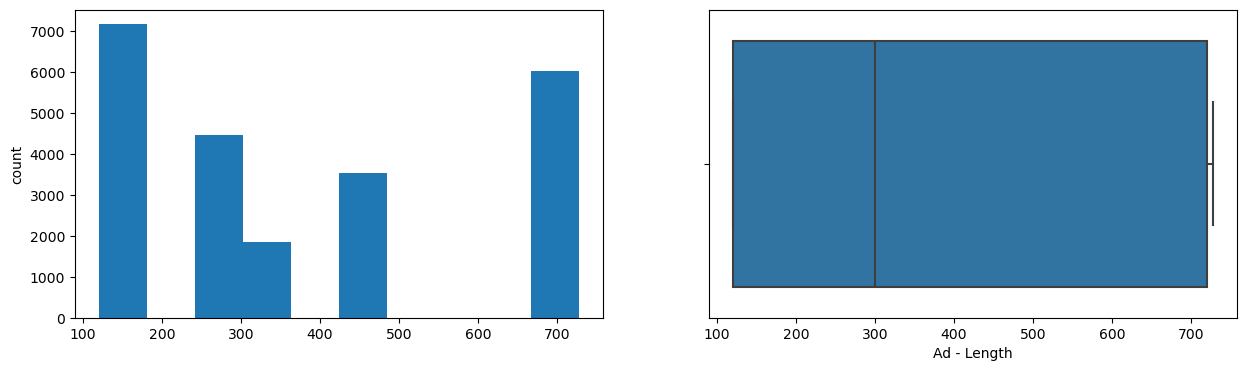

Ad- Width
Skew : 0.21


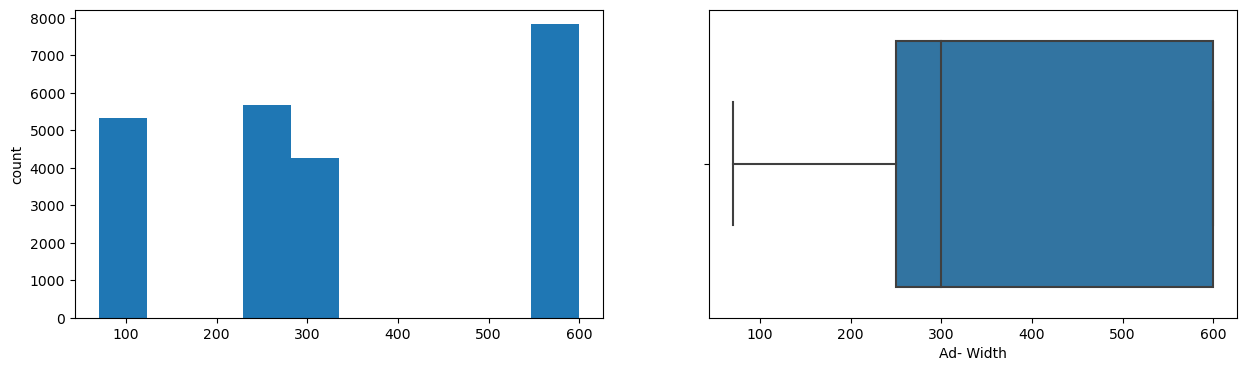

Ad Size
Skew : 1.21


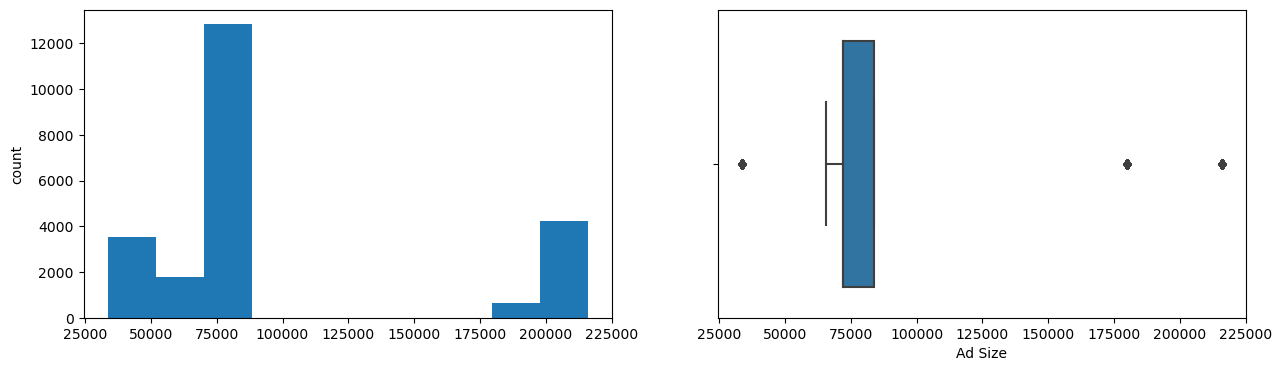

Available_Impressions
Skew : 3.07


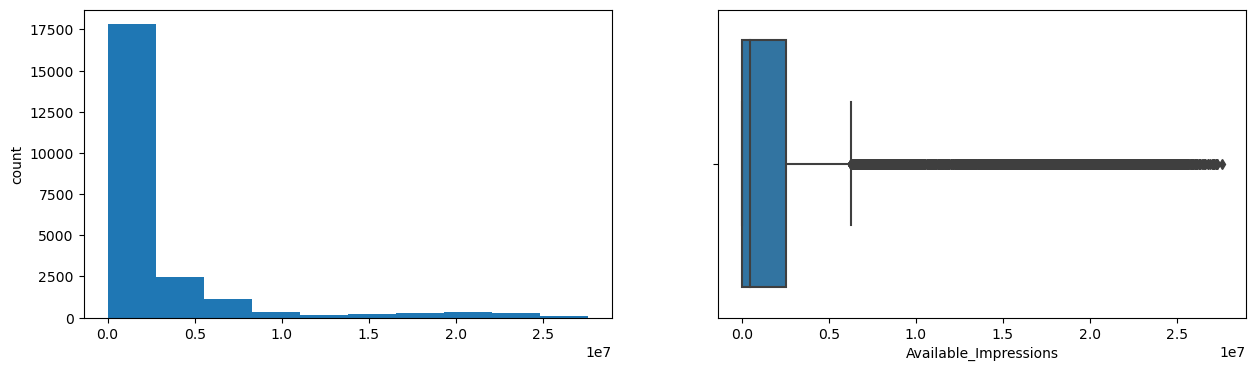

Matched_Queries
Skew : 2.98


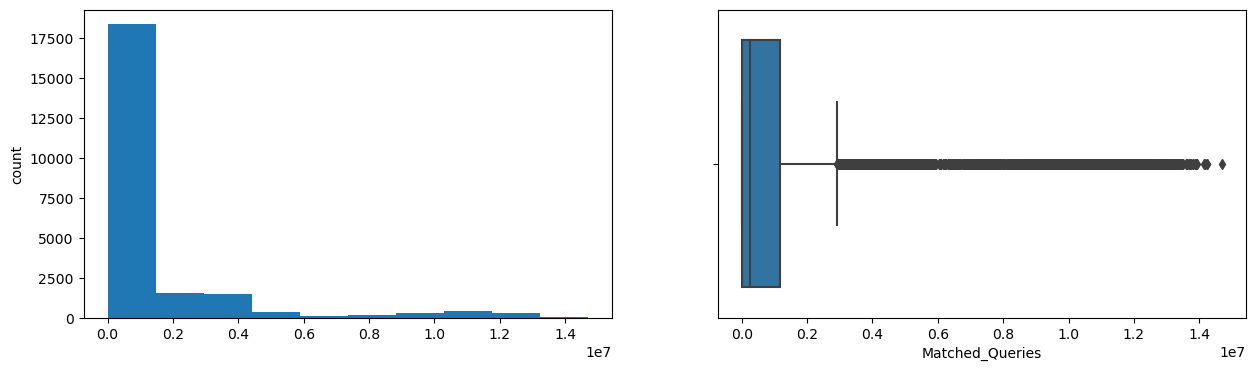

Impressions
Skew : 2.97


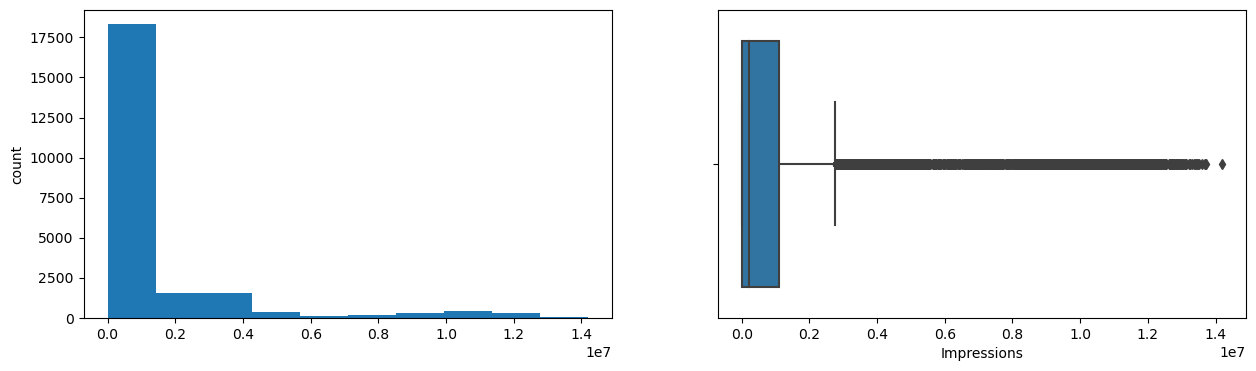

Clicks
Skew : 2.94


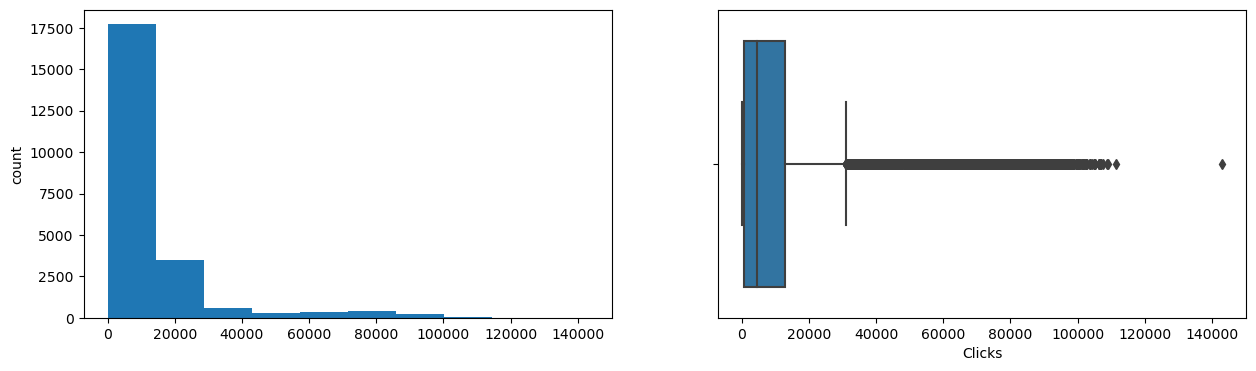

Spend
Skew : 2.58


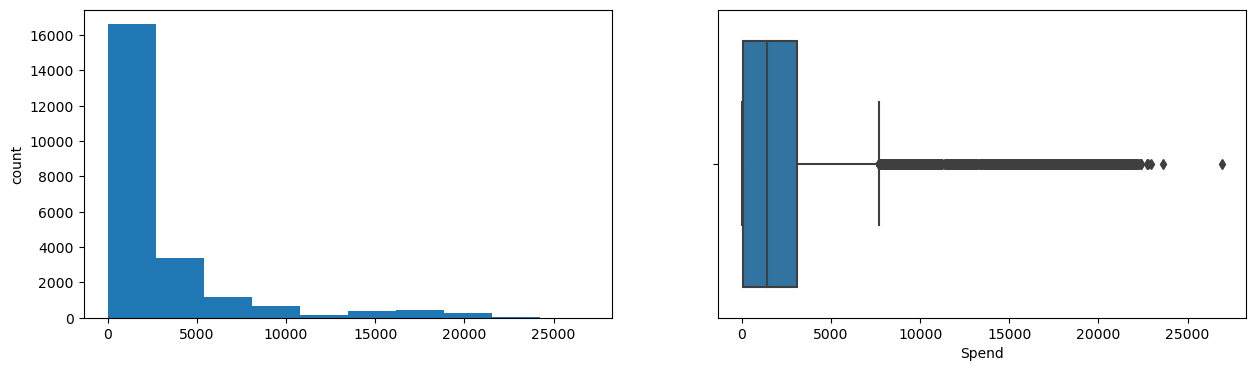

Fee
Skew : -2.3


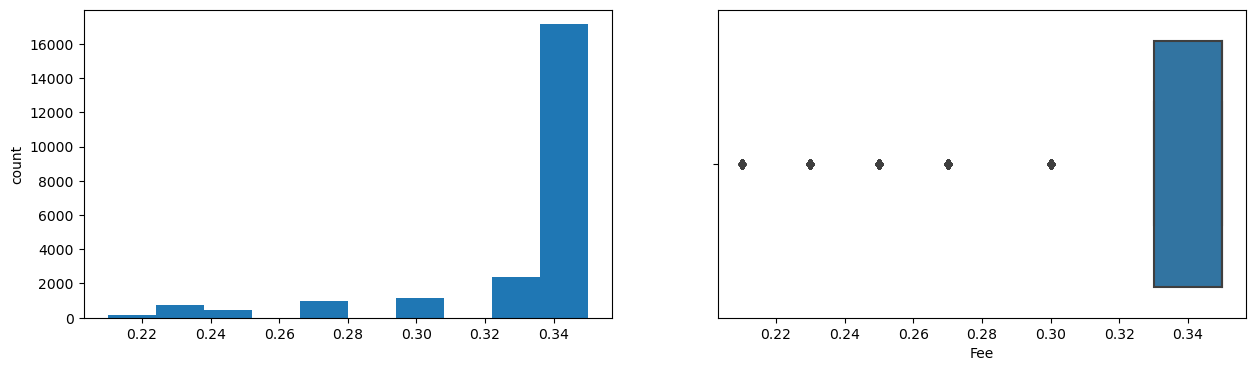

Revenue
Skew : 2.79


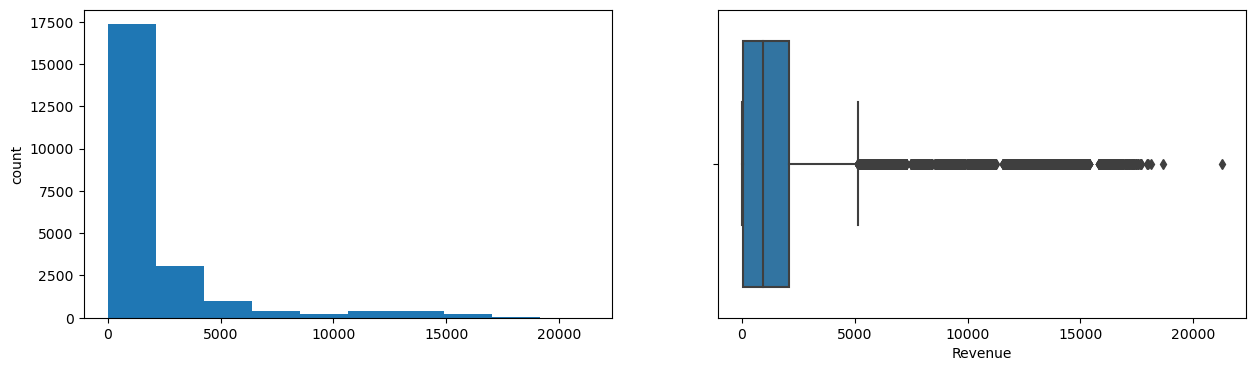

CTR
Skew : 5.43


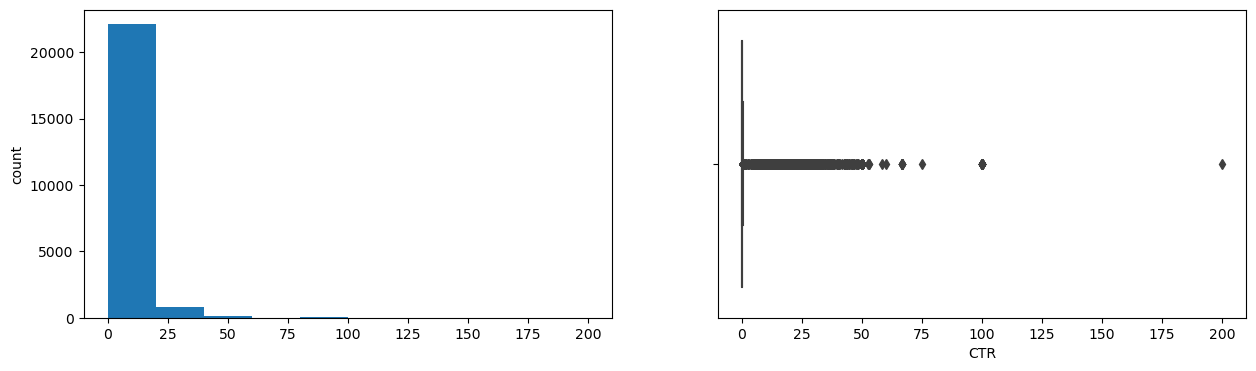

CPM
Skew : 22.32


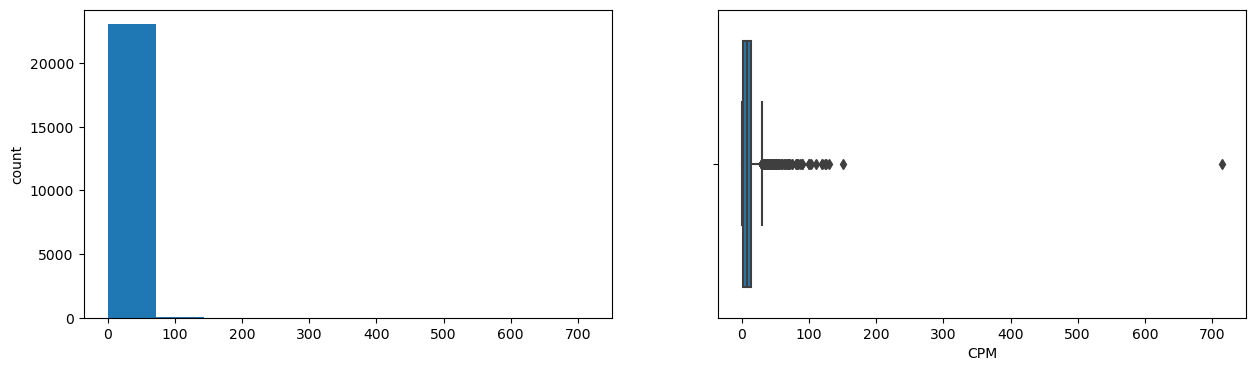

CPC
Skew : 1.84


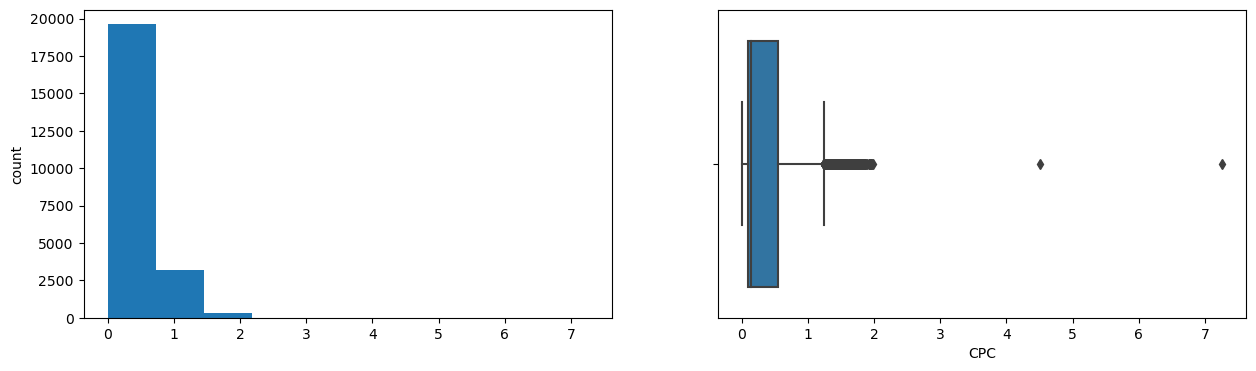

In [249]:
for col in data_df.columns[:]:
    print(col)
    print('Skew :',round(data_df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data_df[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data_df[col])
    plt.show()

In [ ]:
#Treating Outlier

In [250]:
#treating outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [251]:
data_df.columns

Index(['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

In [272]:
## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(data_df['Ad Size'])
print("lower range",lr, "and upper range", ur)

lower range 54000.0 and upper range 102000.0


In [273]:
data_df['Ad Size']=np.where(data_df['Ad Size']>ur,ur,data_df['Ad Size'])
data_df['Ad Size']=np.where(data_df['Ad Size']<lr,lr,data_df['Ad Size'])

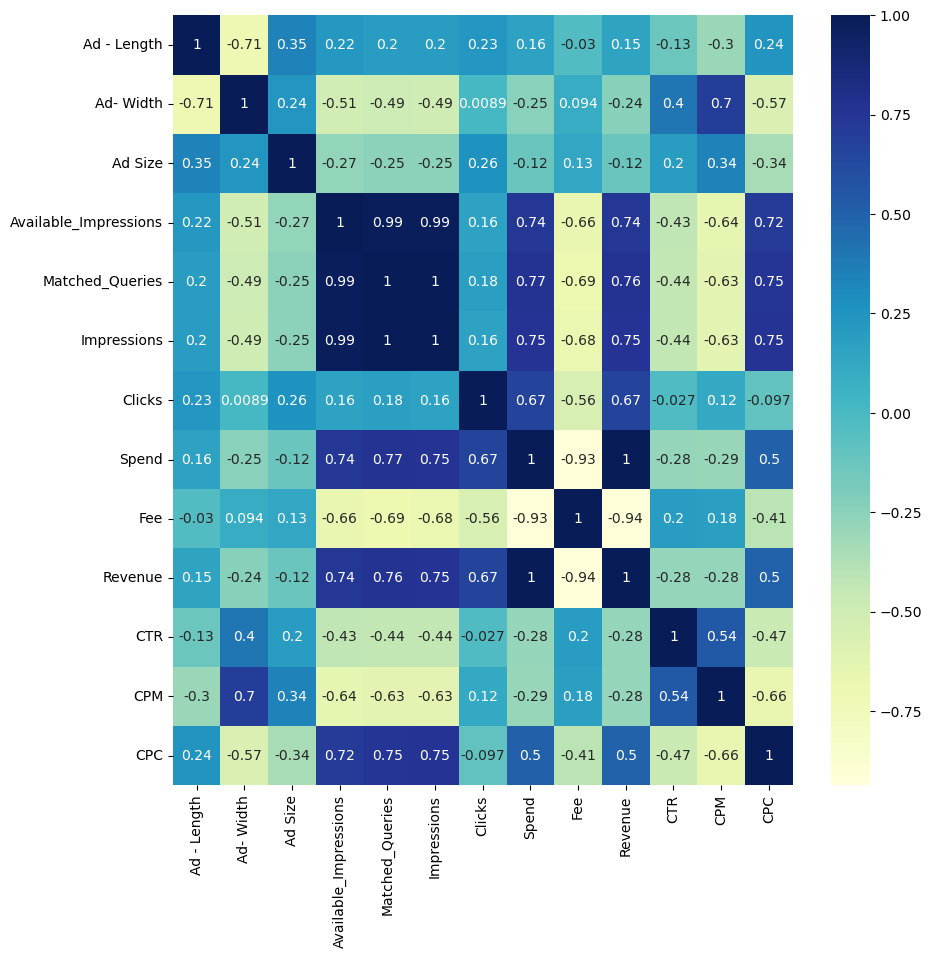

In [275]:
plt.figure(figsize  = (10,10))
sns.heatmap(data_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
#univariate analysis

In [ ]:
#Categorical data

In [174]:
df.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC', 'KMEANS', 'Freq'],
      dtype='object')

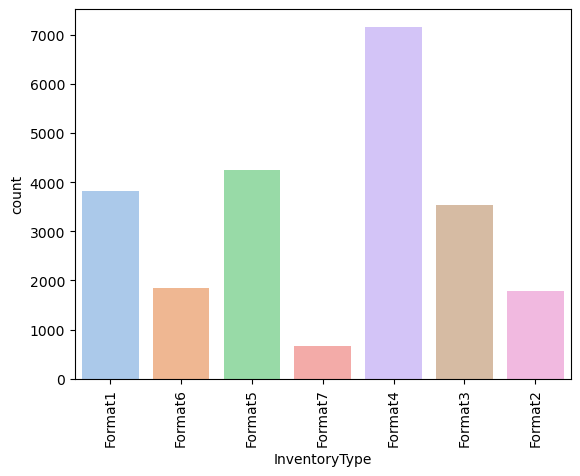

In [175]:
sns.countplot(x='InventoryType', data=df, palette='pastel')
plt.xticks(rotation = 90);

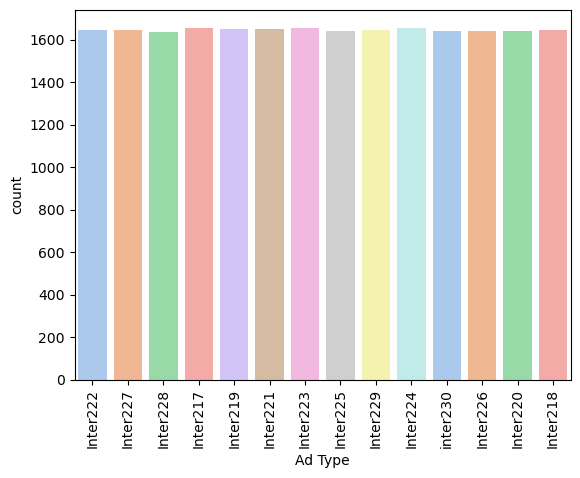

In [176]:
sns.countplot(x='Ad Type', data=df, palette='pastel')
plt.xticks(rotation = 90);

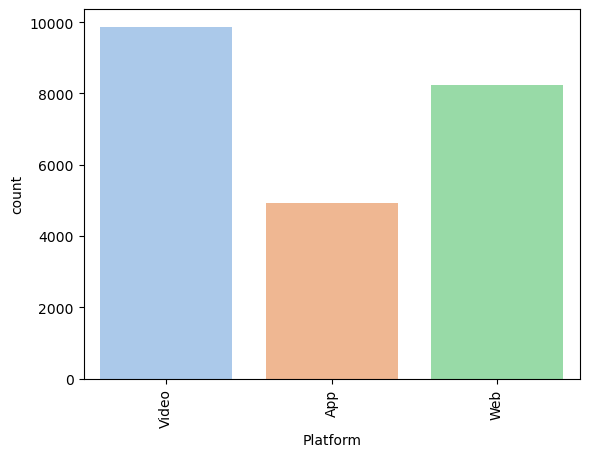

In [177]:
sns.countplot(x='Platform', data=df, palette='pastel')
plt.xticks(rotation = 90);

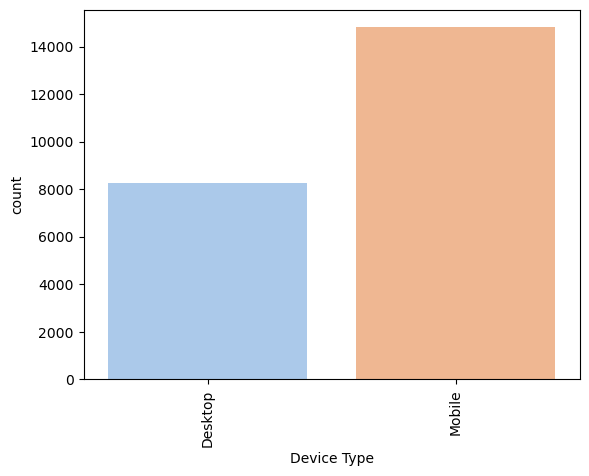

In [178]:
sns.countplot(x='Device Type', data=df, palette='pastel')
plt.xticks(rotation = 90);

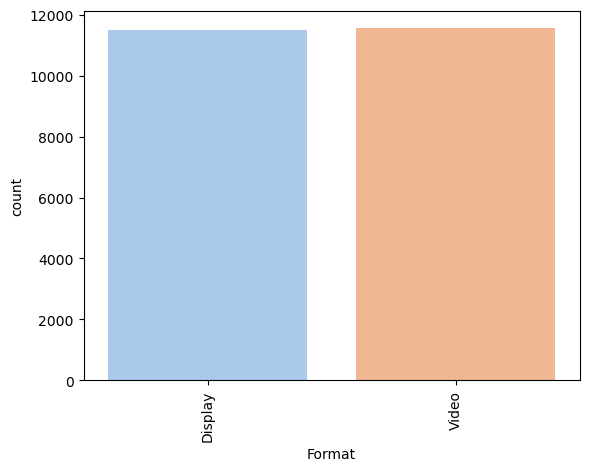

In [179]:
sns.countplot(x='Format', data=df, palette='pastel')
plt.xticks(rotation = 90);

In [ ]:
#Numeriv vs Numeric

Text(0, 0.5, 'Impressions')

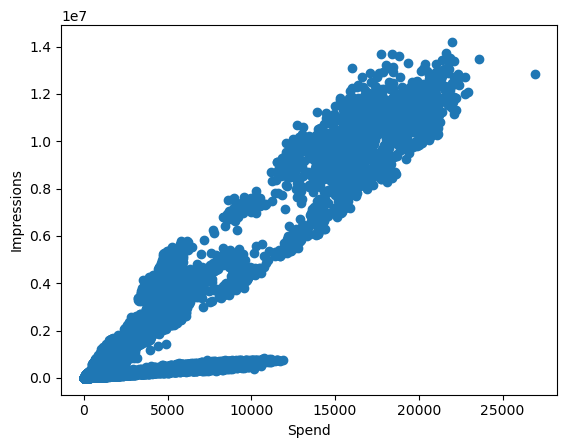

In [180]:
plt.scatter(x='Spend',y='Impressions',data=df)
plt.xlabel('Spend',fontsize = 10)
plt.ylabel('Impressions',fontsize = 10)

In [ ]:
#categorical vs Catergorical

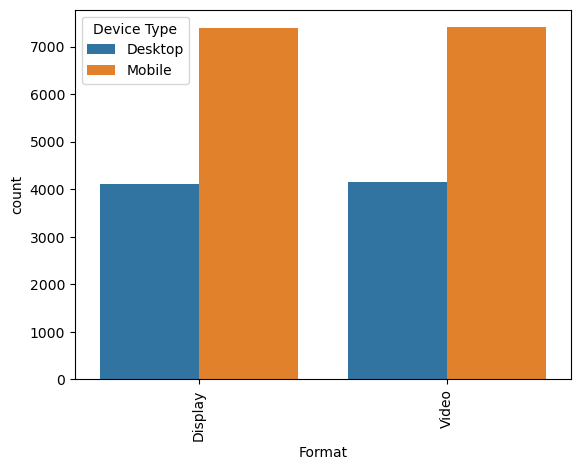

In [193]:
sns.countplot(x='Format', hue='Device Type', data=df)
plt.xticks(rotation = 90);

In [ ]:
#Numeric vs Categorical

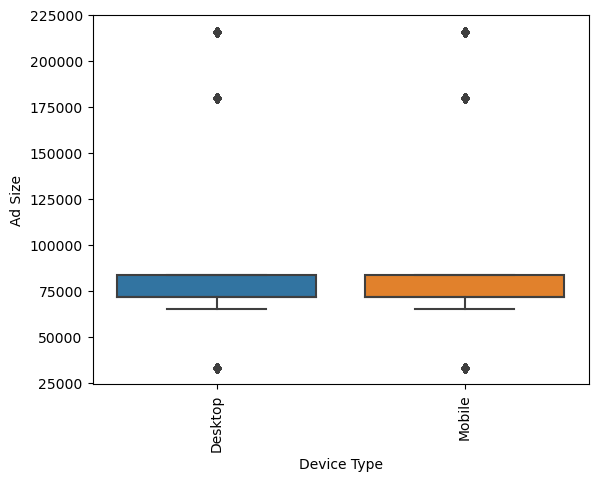

In [189]:
fig_dims = (12, 5)
sns.boxplot(x='Device Type', y='Ad Size', data=df)
plt.xticks(rotation = 90);

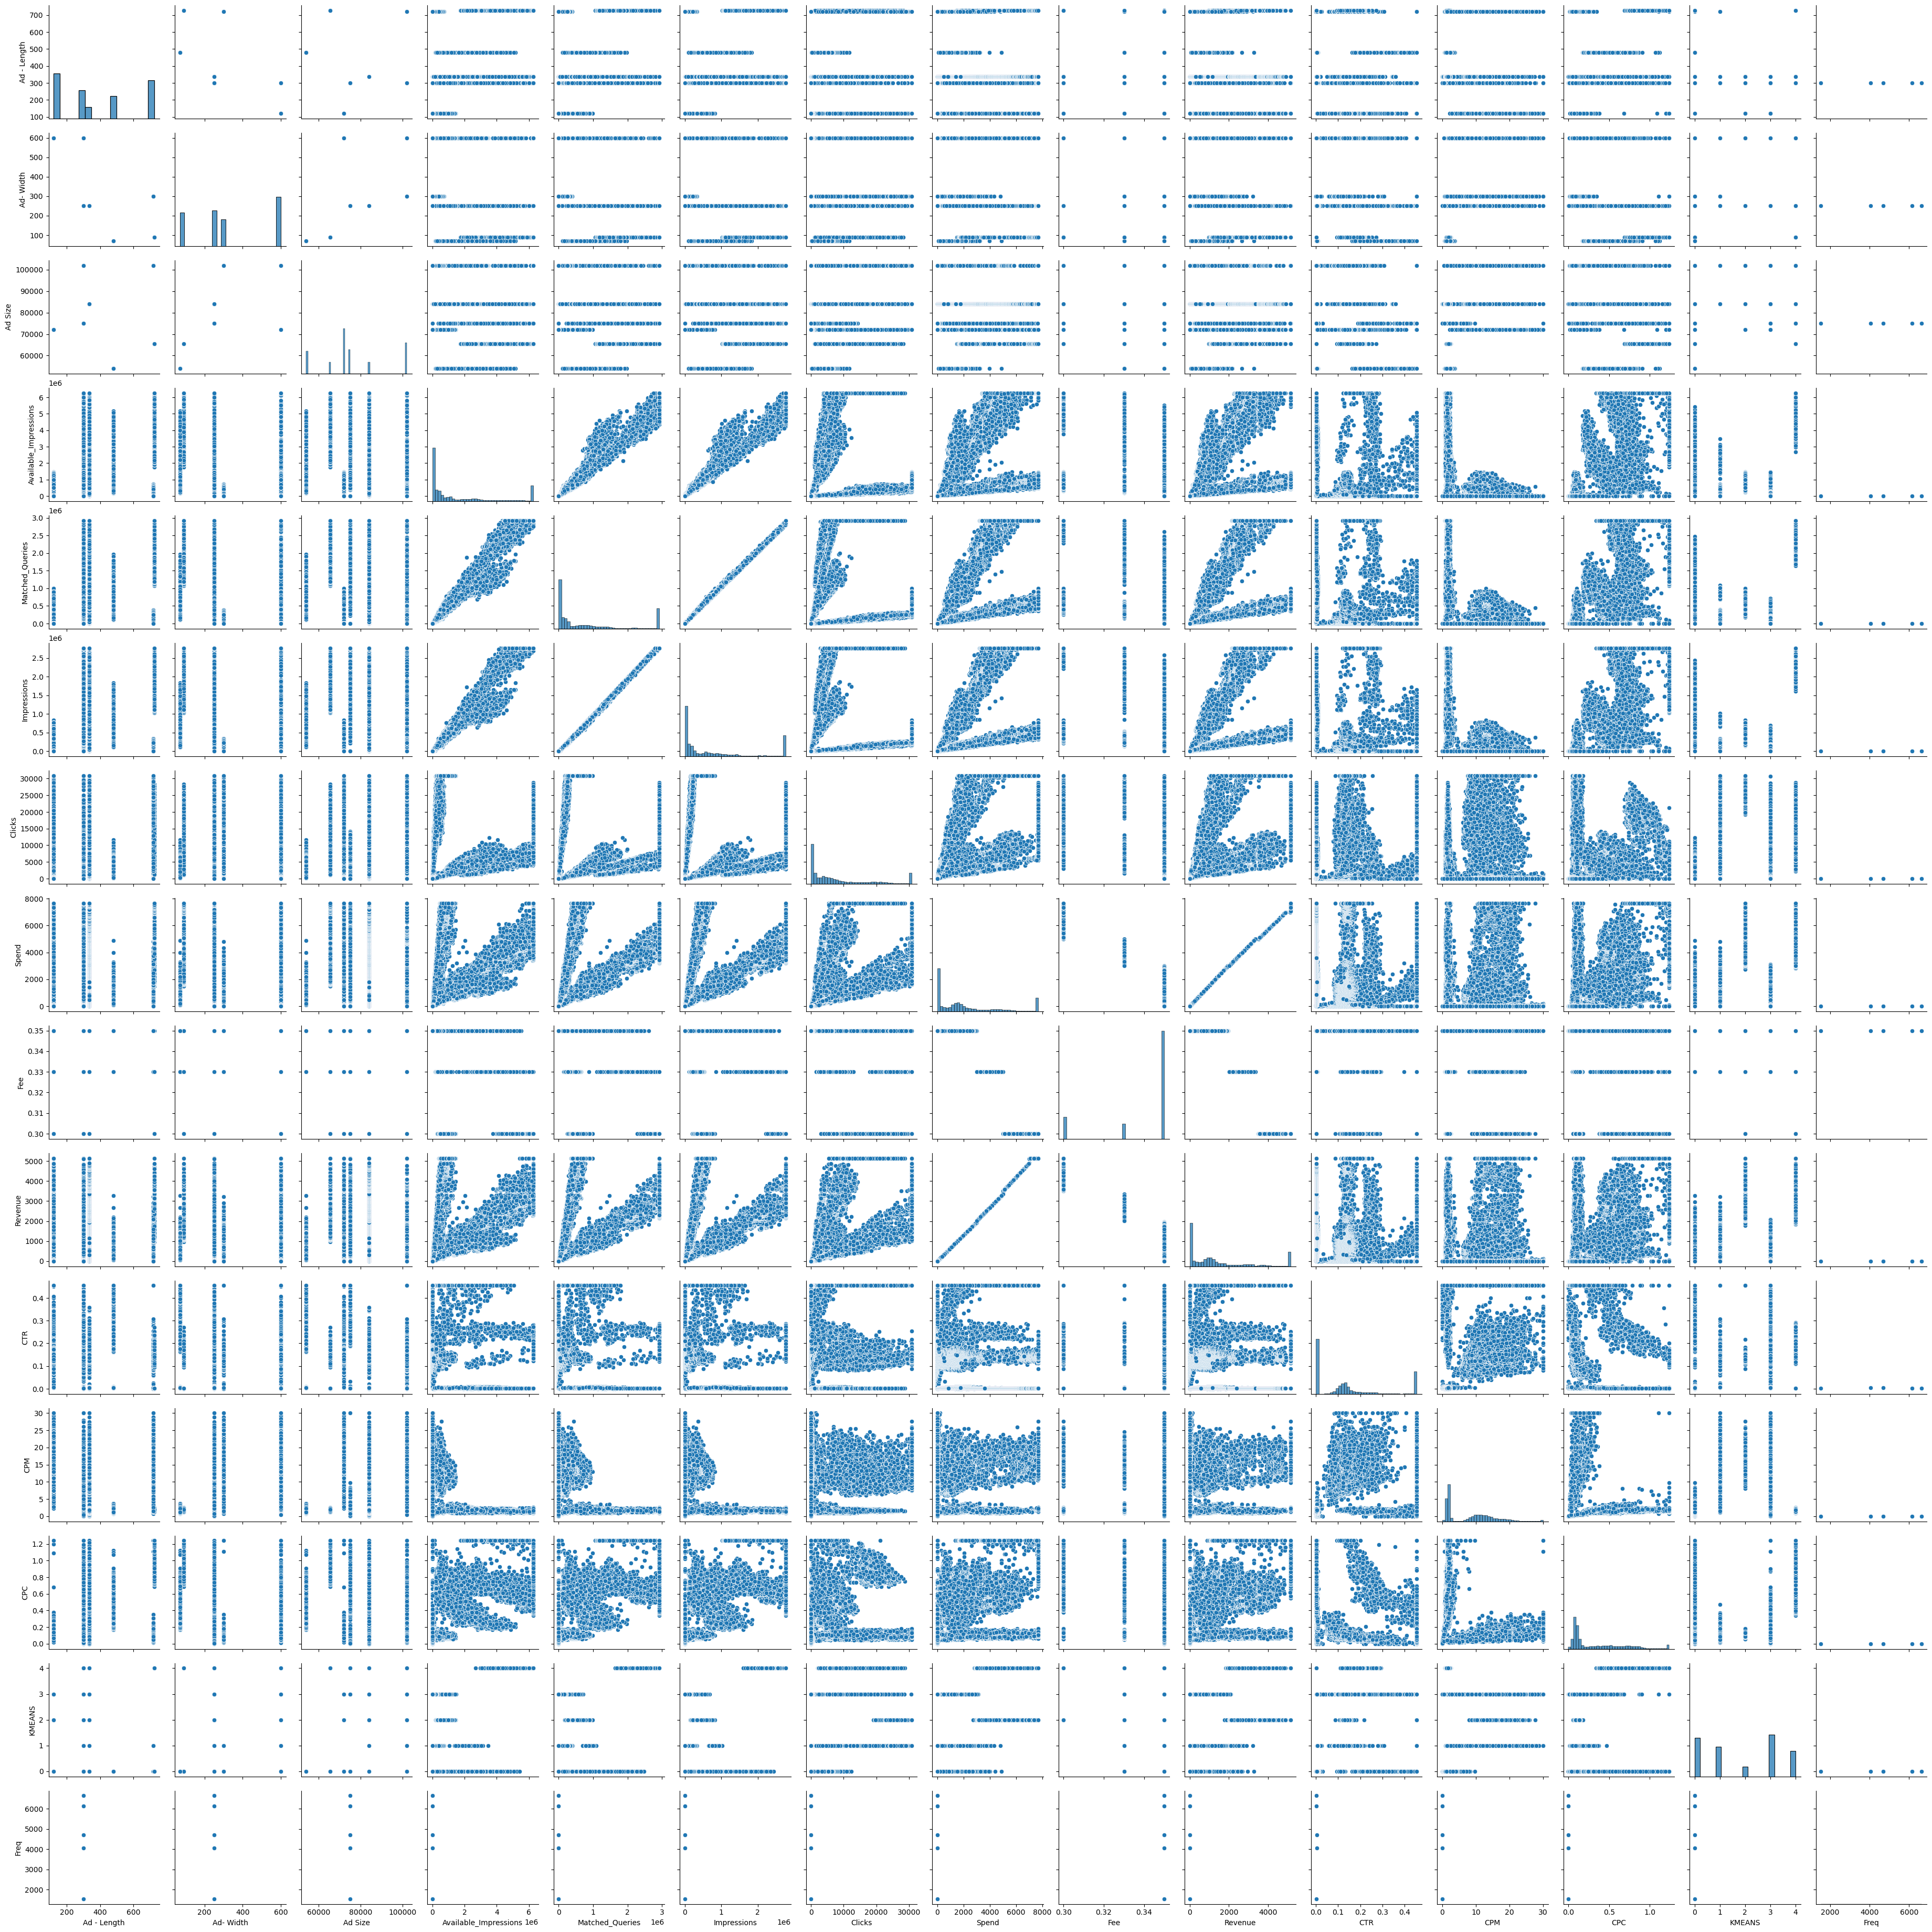

In [332]:
sns.pairplot(data_df)
fig_dims = (5, 5)

# Part 1 - Clustering: Perform z-score scaling and discuss how it affects the speed of the algorithm

In [276]:
from scipy.stats import zscore
scaled_data = data_df.apply(zscore)

In [277]:
scaled_data.head()

Ad - Length  Ad- Width   Ad Size  Available_Impressions  Matched_Queries  \
0    -0.364496  -0.432797 -0.102518              -0.755333        -0.778949   
1    -0.364496  -0.432797 -0.102518              -0.755345        -0.778988   
2    -0.364496  -0.432797 -0.102518              -0.754900        -0.778919   
3    -0.364496  -0.432797 -0.102518              -0.755040        -0.778781   
4    -0.364496  -0.432797 -0.102518              -0.755610        -0.779030   

   Impressions    Clicks    Spend       Fee   Revenue       CTR       CPM  \
0    -0.768478 -0.867488 -0.89317  0.535724 -0.880093 -0.891201 -1.194562   
1    -0.768516 -0.867488 -0.89317  0.535724 -0.880093 -0.888615 -1.194562   
2    -0.768445 -0.867488 -0.89317  0.535724 -0.880093 -0.893142 -1.194562   
3    -0.768302 -0.867488 -0.89317  0.535724 -0.880093 -0.898315 -1.194562   
4    -0.768560 -0.867488 -0.89317  0.535724 -0.880093 -0.884734 -1.194562   

       CPC  
0 -1.04114  
1 -1.04114  
2 -1.04114  
3 -1.04114  
4 -1.04114

Ad - Length
Skew : 0.33


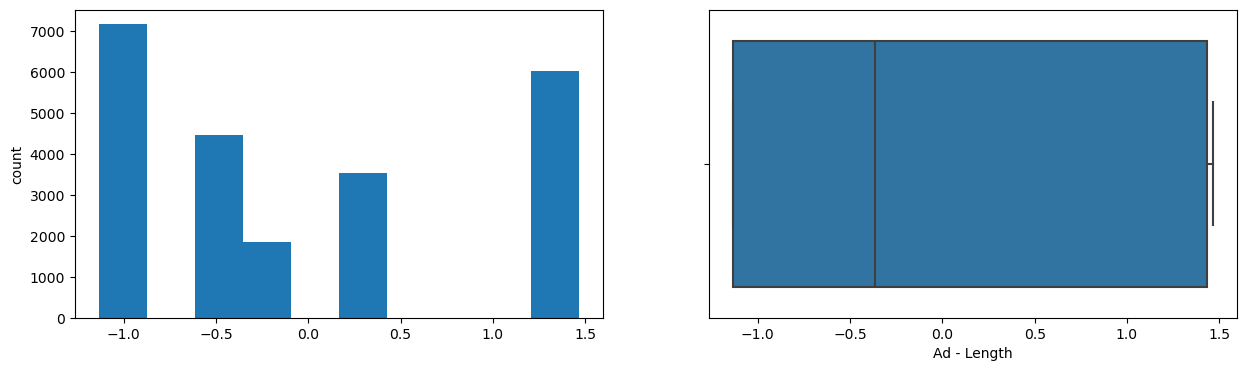

Ad- Width
Skew : 0.21


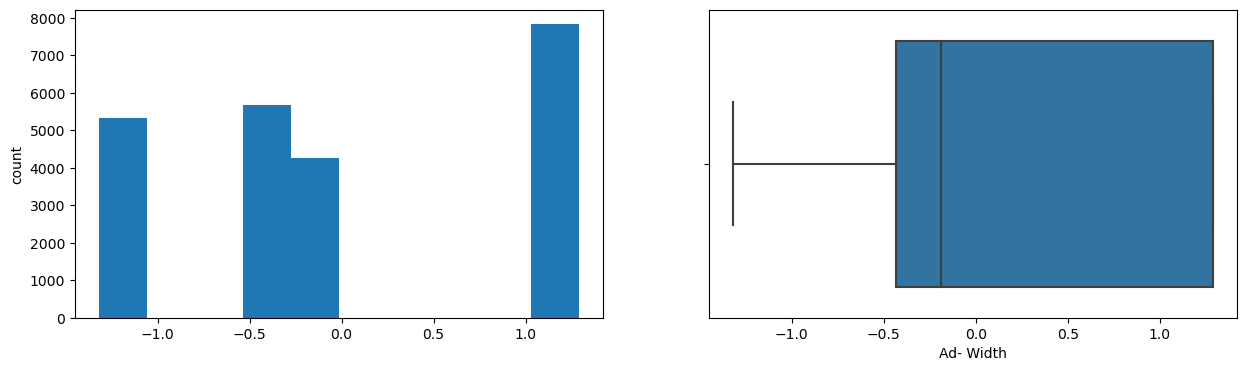

Ad Size
Skew : 0.45


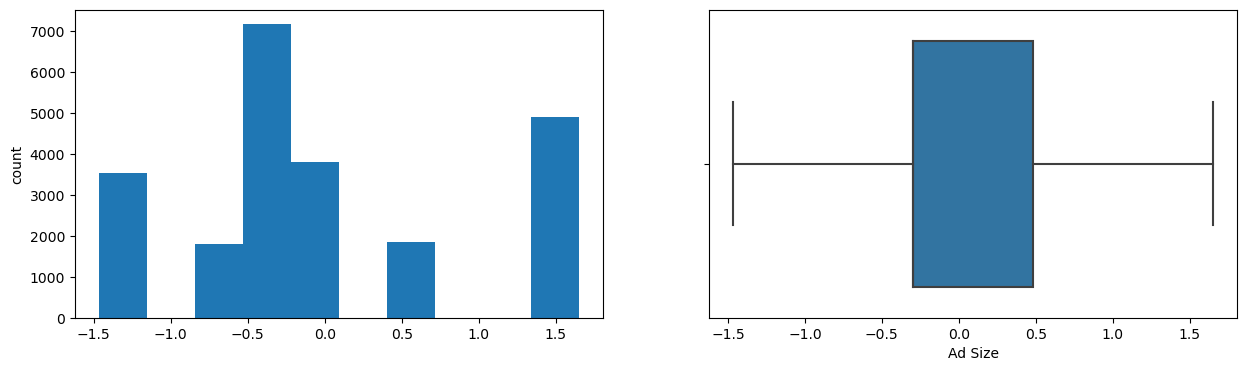

Available_Impressions
Skew : 1.25


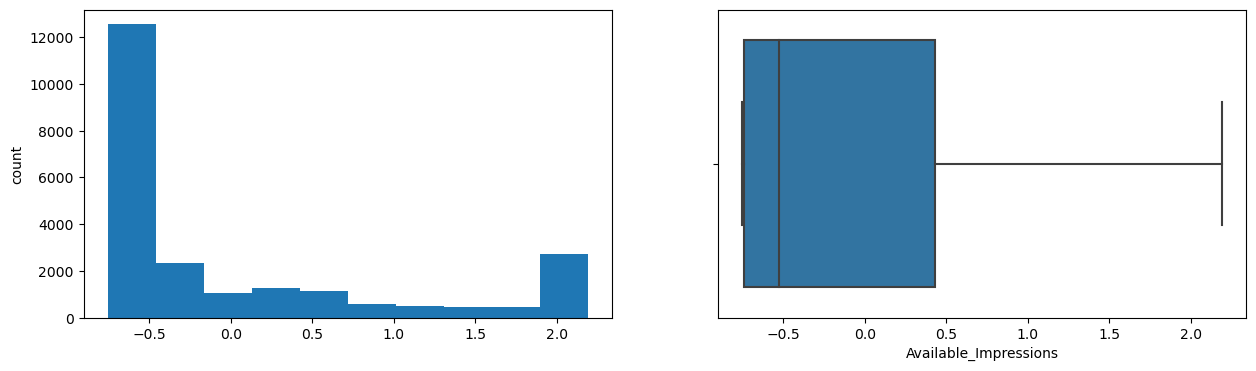

Matched_Queries
Skew : 1.21


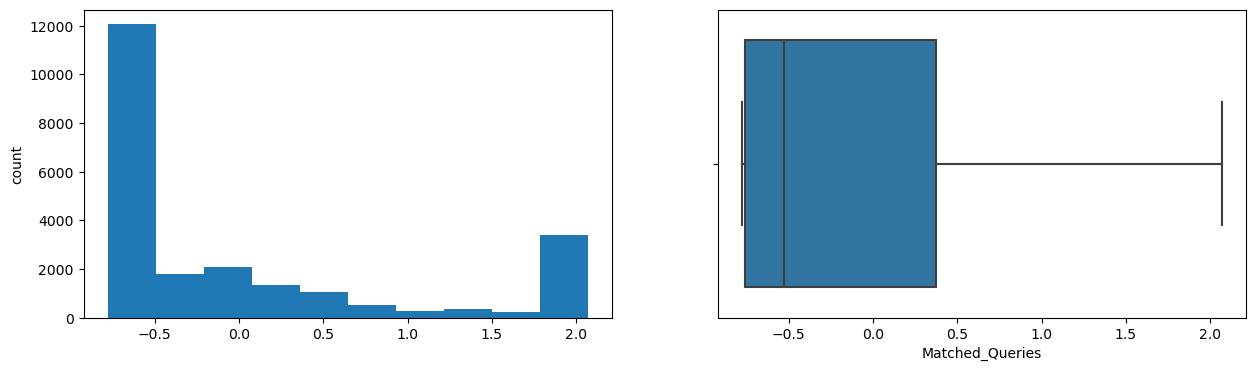

Impressions
Skew : 1.2


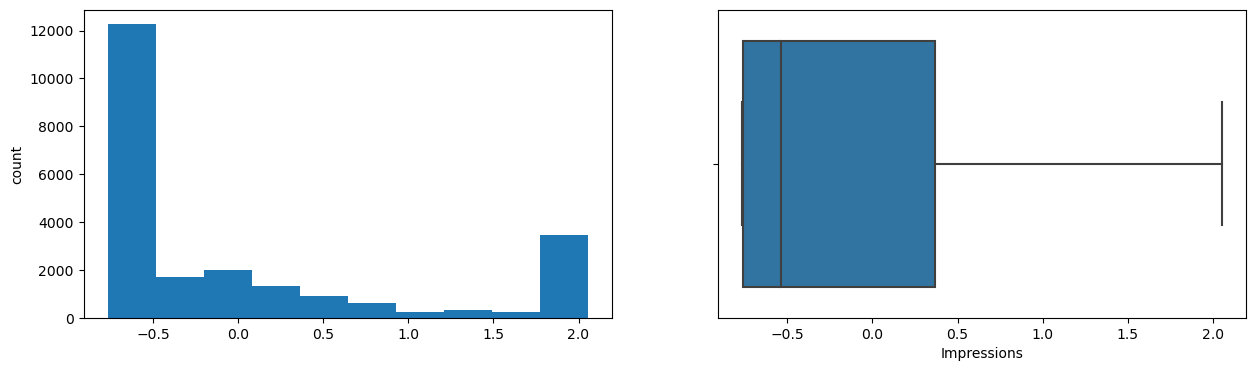

Clicks
Skew : 1.2


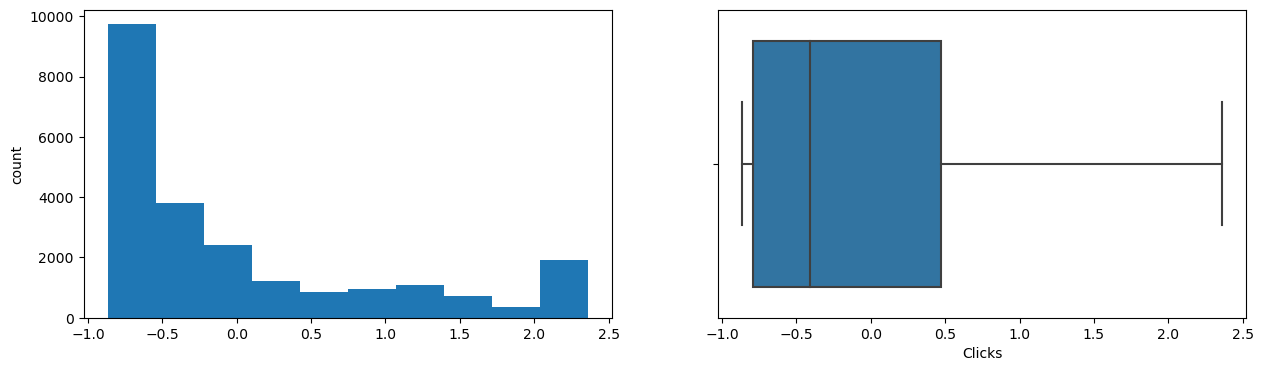

Spend
Skew : 1.17


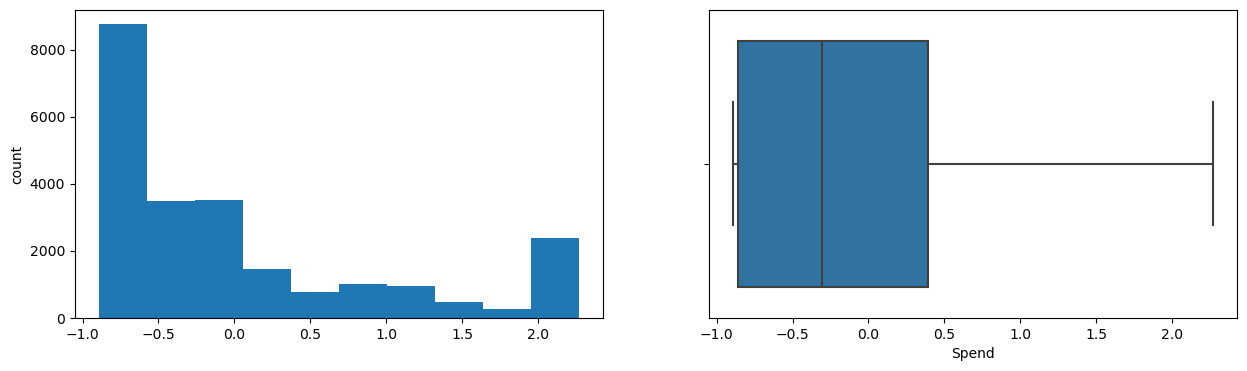

Fee
Skew : -1.58


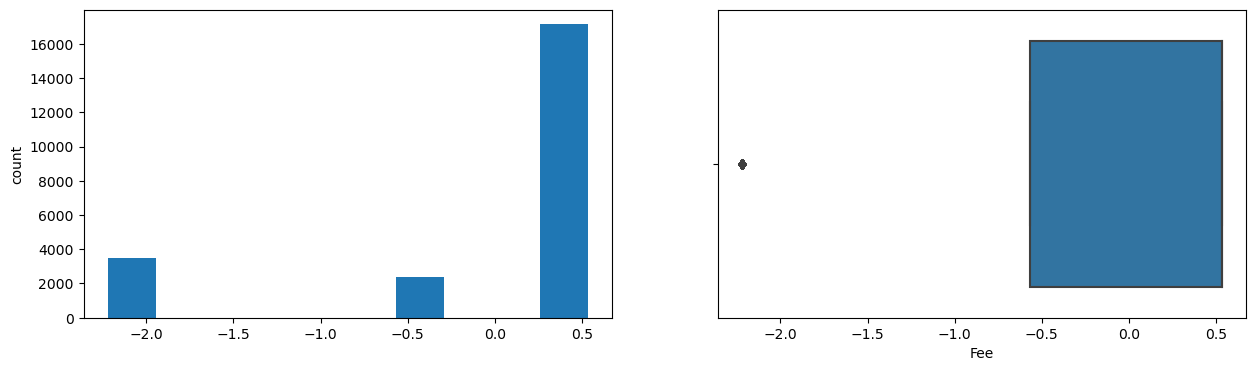

Revenue
Skew : 1.19


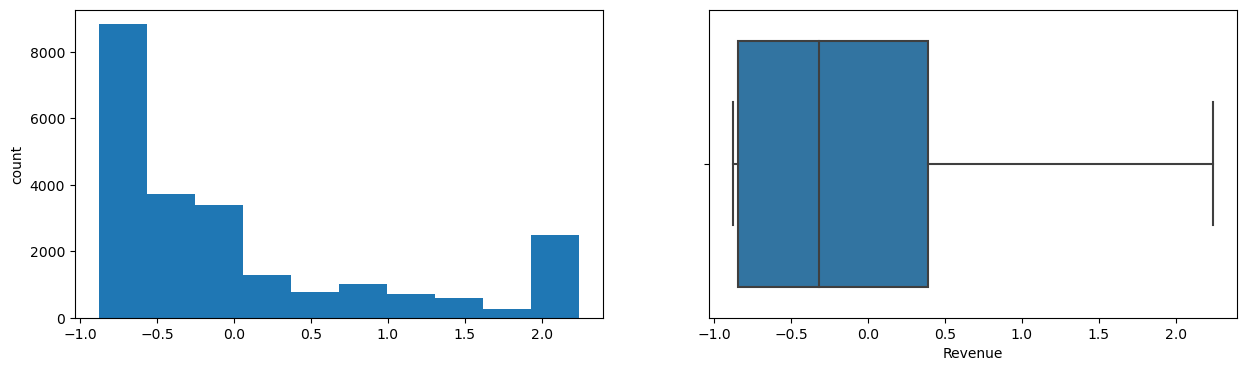

CTR
Skew : 1.06


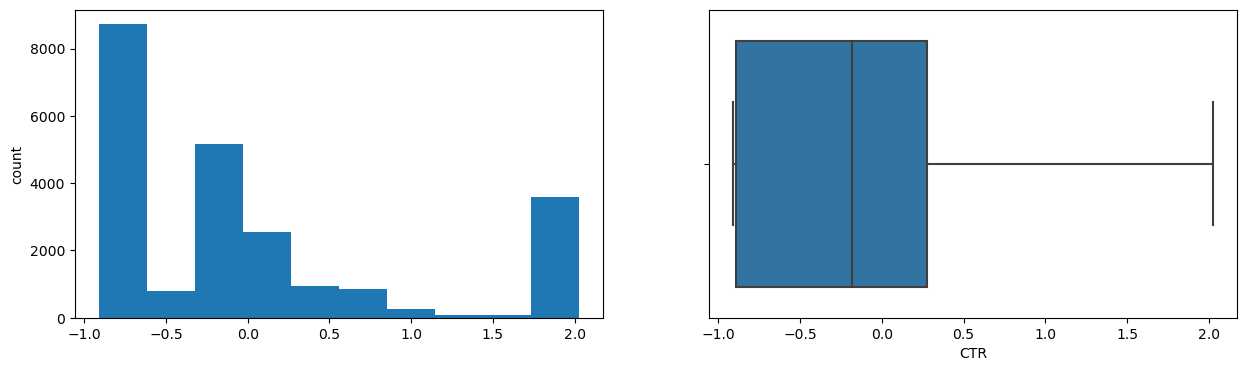

CPM
Skew : 0.69


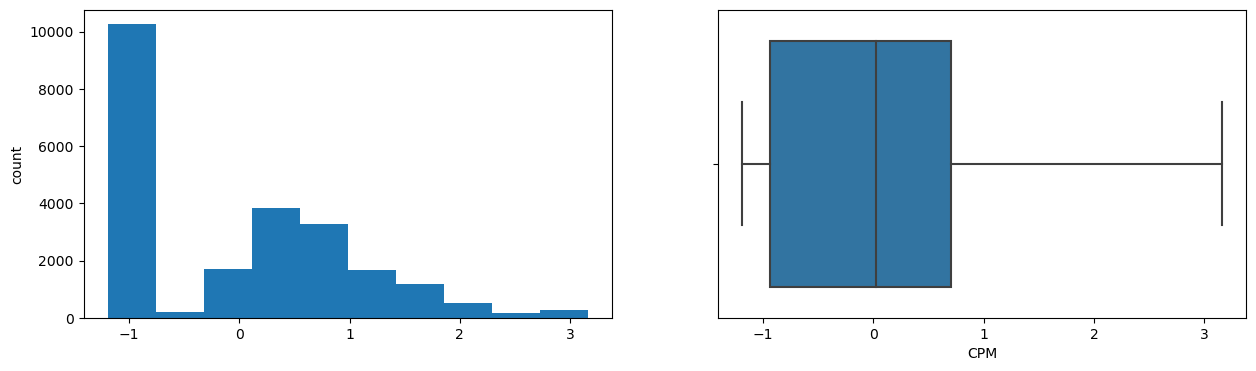

CPC
Skew : 1.13


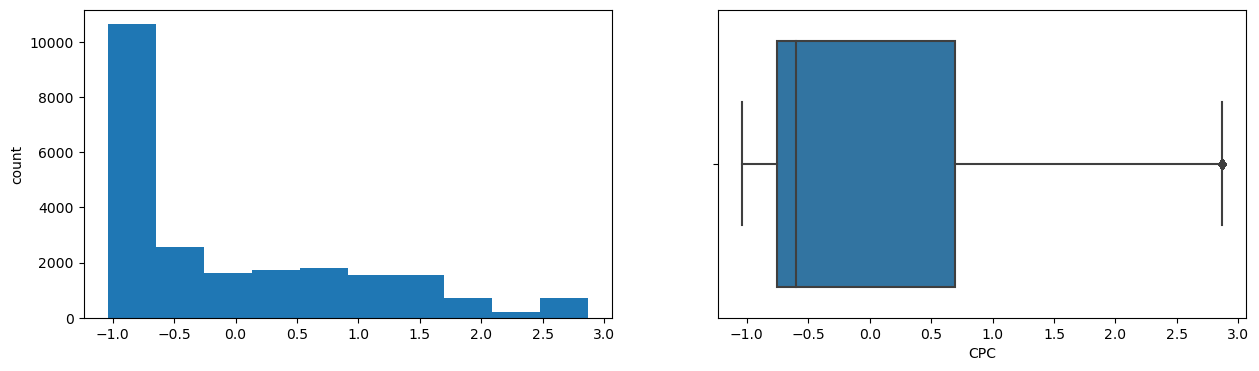

In [278]:
for col in scaled_data.columns[:]:
    print(col)
    print('Skew :',round(scaled_data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    scaled_data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=scaled_data[col])
    plt.show()

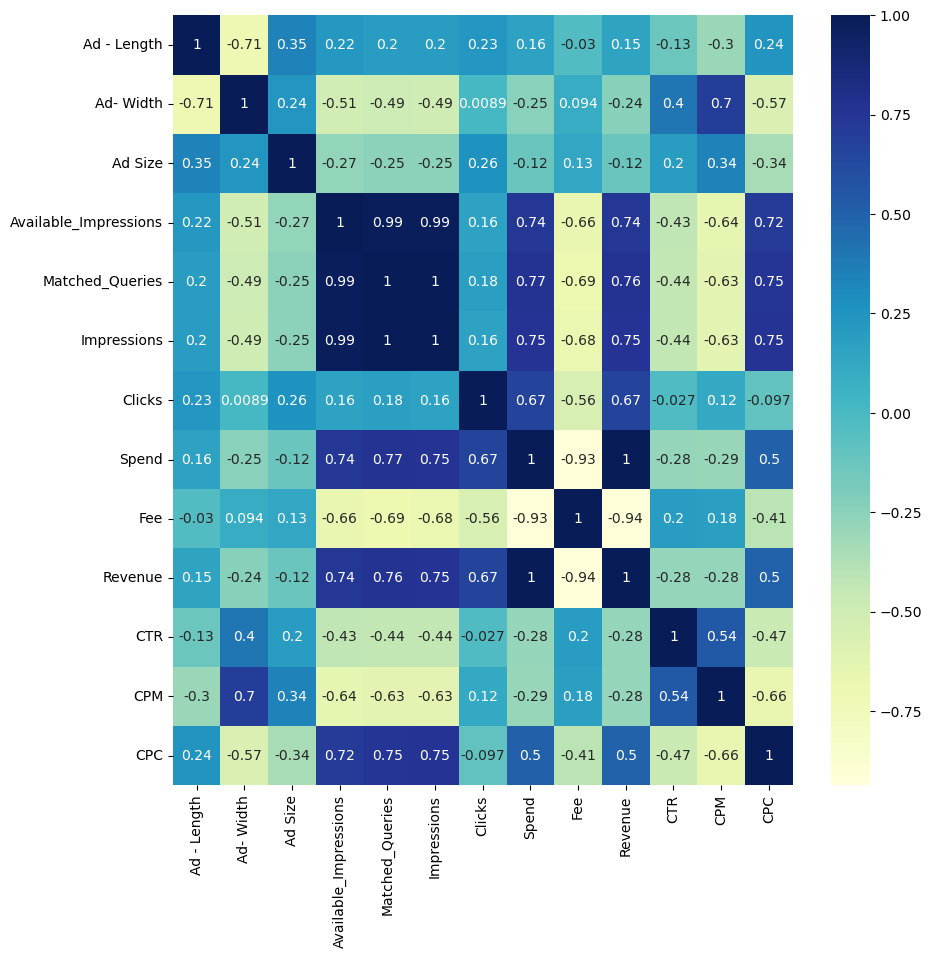

In [279]:
plt.figure(figsize  = (10,10))
sns.heatmap(scaled_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Part 1 - Clustering: Perform Hierarchical clustering by constructing a Dendrogram using WARD and Euclidean distance.

In [280]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [281]:
wardlink = linkage(scaled_data, method = 'ward',metric='euclidean')

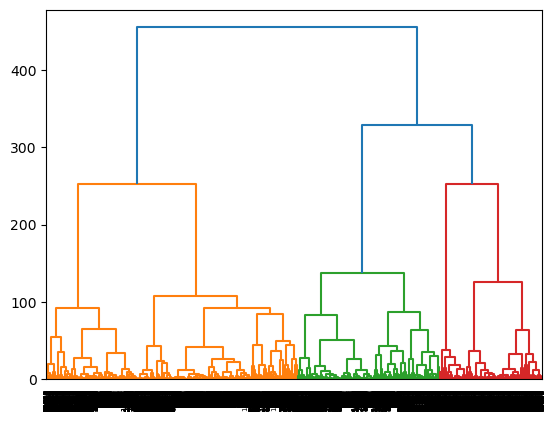

In [333]:
dend = dendrogram(wardlink)

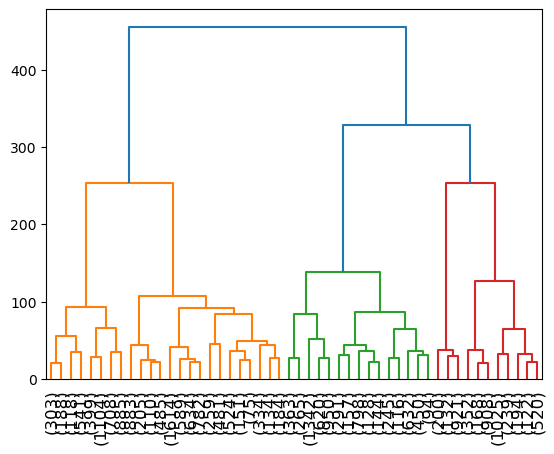

In [282]:
dend = dendrogram(wardlink, 
                 truncate_mode = 'lastp',
                 p =50,
                 leaf_rotation=90,
                 leaf_font_size=12)

In [283]:
from scipy.cluster.hierarchy import fcluster

In [284]:
#Method 1
clusters = fcluster(wardlink, 5, criterion = 'maxclust')
clusters

array([2, 2, 2, ..., 1, 2, 1], dtype=int32)

In [285]:
#Method 2
clusters = fcluster(wardlink, 220, criterion = 'distance')
clusters

array([2, 2, 2, ..., 1, 2, 1], dtype=int32)

# Part 1 - Clustering: Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

In [286]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=1)

In [287]:
# Fit K means on the scaled_df
k_means.fit(scaled_data)

KMeans(n_clusters=2, random_state=1)

In [289]:
# Get the labels
k_means.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [290]:
# Get the labels
k_means.inertia_

187902.64770993276

In [291]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_data)
k_means.inertia_

299858.0

In [292]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_data)
k_means.inertia_

187902.67677226965

In [293]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_data)
k_means.inertia_

139992.99382058423

In [294]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_data)
k_means.inertia_

105294.18842883021

In [295]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_data)
k_means.inertia_

72133.68801977328

In [296]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_data)
k_means.inertia_

62259.98939794786

In [297]:
k_means = KMeans(n_clusters = 7)
k_means.fit(scaled_data)
k_means.inertia_

55151.52147681743

In [298]:
k_means = KMeans(n_clusters = 8)
k_means.fit(scaled_data)
k_means.inertia_

49712.900744136154

In [299]:
k_means = KMeans(n_clusters = 9)
k_means.fit(scaled_data)
k_means.inertia_

44876.10999177626

In [300]:
k_means = KMeans(n_clusters = 10)
k_means.fit(scaled_data)
k_means.inertia_

41186.135599595604

In [334]:
wss = []

In [335]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_data)
    wss.append(KM.inertia_)

In [336]:
wss

[299858.0,
 187902.64770993276,
 139992.87426412935,
 106152.74229789544,
 72133.6934158383,
 62259.98939794785,
 55151.52147681743,
 49733.040051637116,
 46049.739022108784,
 41531.157690828666]

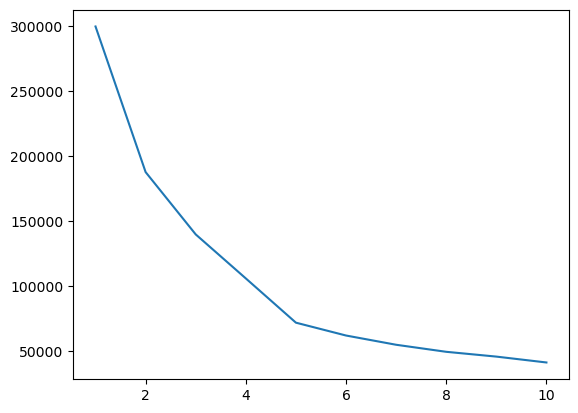

In [337]:
plt.plot(range(1,11),wss)

In [338]:
a=[1,2,3,4,5,6,7,8,9,10]

<AxesSubplot:>

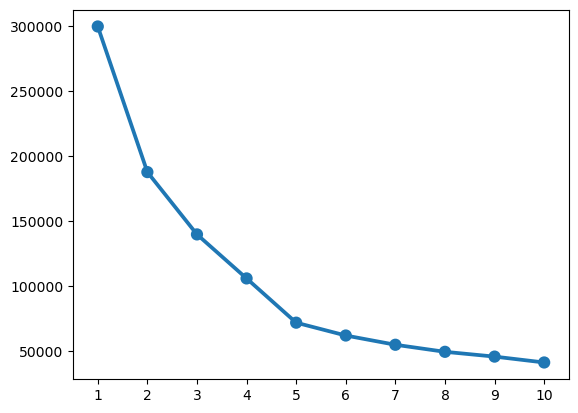

In [339]:
sns.pointplot(a,wss)

# Part 1 - Clustering: Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [307]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [308]:
ss = []
for i in range(2,11):
    k_means = KMeans(n_clusters = i,random_state=1)
    k_means.fit(scaled_data)
    labels = k_means.labels_
    print("For K=",i,":",silhouette_score(scaled_data,labels,random_state=1))
    ss.append(silhouette_score(scaled_data,labels,random_state=1))

For K= 2 : 0.40318725804432765
For K= 3 : 0.34547066630442486
For K= 4 : 0.41284225649057377
For K= 5 : 0.48020321346347616
For K= 6 : 0.47613989974053916
For K= 7 : 0.46883074857917595
For K= 8 : 0.43286664054059454
For K= 9 : 0.4470009074272004
For K= 10 : 0.44249930188496617


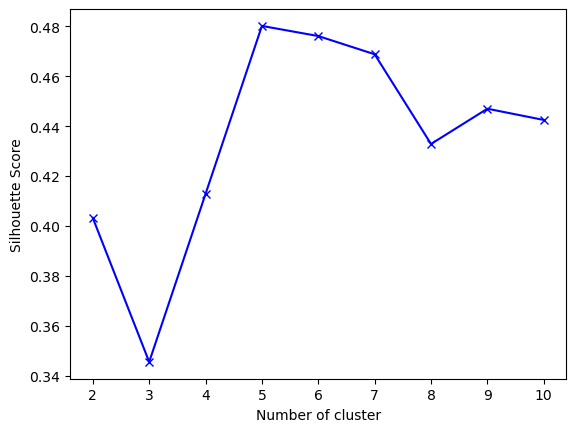

In [309]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(scaled_data)
    labels = kmeans.predict(scaled_data)
    sc[k] = silhouette_score(scaled_data, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

In [310]:
k_means = KMeans(n_clusters = 5, init='random')
k_means.fit(scaled_data)
labels = k_means.labels_
labels

array([0, 0, 0, ..., 1, 3, 1])

In [311]:
data_df['KMEANS'] = labels
data_df.head()

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0          300        250  75000.0                 1806.0            325.0   
1          300        250  75000.0                 1780.0            285.0   
2          300        250  75000.0                 2727.0            356.0   
3          300        250  75000.0                 2430.0            497.0   
4          300        250  75000.0                 1218.0            242.0   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  KMEANS  
0        323.0     1.0    0.0  0.35      0.0  0.0031  0.0  0.0       0  
1        285.0     1.0    0.0  0.35      0.0  0.0035  0.0  0.0       0  
2        355.0     1.0    0.0  0.35      0.0  0.0028  0.0  0.0       0  
3        495.0     1.0    0.0  0.35      0.0  0.0020  0.0  0.0       0  
4        242.0     1.0    0.0  0.35      0.0  0.0041  0.0  0.0       0

In [340]:
data_df.KMEANS.value_counts().sort_index()

0    6139
1    4698
2    1539
3    6641
4    4049
Name: KMEANS, dtype: int64

In [313]:
data_df['Freq'] = data_df.KMEANS.value_counts().sort_index()

In [315]:
data_df.head()

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0          300        250  75000.0                 1806.0            325.0   
1          300        250  75000.0                 1780.0            285.0   
2          300        250  75000.0                 2727.0            356.0   
3          300        250  75000.0                 2430.0            497.0   
4          300        250  75000.0                 1218.0            242.0   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  KMEANS    Freq  
0        323.0     1.0    0.0  0.35      0.0  0.0031  0.0  0.0       0  6139.0  
1        285.0     1.0    0.0  0.35      0.0  0.0035  0.0  0.0       0  4698.0  
2        355.0     1.0    0.0  0.35      0.0  0.0028  0.0  0.0       0  1539.0  
3        495.0     1.0    0.0  0.35      0.0  0.0020  0.0  0.0       0  6641.0  
4        242.0     1.0    0.0  0.35      0.0  0.0041  0.0  0.0       0  4049.0

In [319]:
new_data['Device Type'] = df['Device Type']

In [320]:
new_data.head()

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0          300        250  75000.0                 1806.0            325.0   
1          300        250  75000.0                 1780.0            285.0   
2          300        250  75000.0                 2727.0            356.0   
3          300        250  75000.0                 2430.0            497.0   
4          300        250  75000.0                 1218.0            242.0   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  KMEANS  \
0        323.0     1.0    0.0  0.35      0.0  0.0031  0.0  0.0       0   
1        285.0     1.0    0.0  0.35      0.0  0.0035  0.0  0.0       0   
2        355.0     1.0    0.0  0.35      0.0  0.0028  0.0  0.0       0   
3        495.0     1.0    0.0  0.35      0.0  0.0020  0.0  0.0       0   
4        242.0     1.0    0.0  0.35      0.0  0.0041  0.0  0.0       0   

     Freq Device Type  
0  6139.0     Desktop  
1  4698.0      Mobile  
2  1539.0     Desktop  
3  6641.0      Mobile  
4  4049.0     Desktop

In [341]:
new_data.groupby('KMEANS')[['Clicks','Spend','Revenue','CTR','CPM','CPC','Device Type']].mean()

Clicks        Spend      Revenue       CTR        CPM       CPC
KMEANS                                                                       
0        3304.896563  1524.260050   993.233546  0.057494   1.805688  0.535883
1       14085.454848  1254.130773   816.719858  0.205066  11.680540  0.091019
2       30562.689571  6541.996751  4468.732521  0.186870  15.390007  0.111935
3        1888.217889   210.054349   136.563152  0.227035  14.089269  0.104509
4       11253.998024  5742.133729  3880.684347  0.034171   1.572871  0.749202

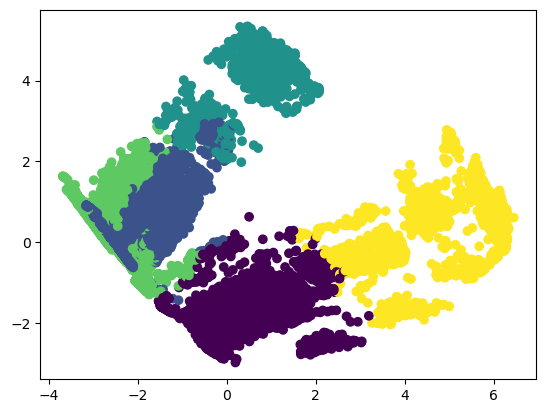

In [342]:
#plt.figure(figsize=(15,6))
from sklearn.decomposition import PCA
#from sklearn.cluster import KMeans
#from sklearn.datasets import load_iris
import pylab as pl
#iris = load_iris()
pca = PCA(n_components = 5).fit(scaled_data)
pca_2d = pca.transform(scaled_data)
#pl.figure('Reference Plot')
#pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=iris.target)
#kmeans = KMeans(n_clusters=3, random_state=111)
#kmeans.fit(iris.data)
pl.figure('K-means with 5 clusters')
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=k_means.labels_)
pl.show()

# Part 1 - Clustering: Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots].

In [323]:
new_data.KMEANS.value_counts().sort_index()

0    6139
1    4698
2    1539
3    6641
4    4049
Name: KMEANS, dtype: int64

In [343]:
mean = new_data.groupby('KMEANS').mean()
median = new_data.groupby('KMEANS').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean','group_3 Mean','group_4 Mean' ,
                   'group_0 Median', 'group_1 Median', 'group_2 Median','group_3 Median','group_4 Median']
df_kmeans.T

group_0 Mean   group_1 Mean   group_2 Mean  \
Ad - Length            4.244913e+02     682.020434     141.543860   
Ad- Width              1.462127e+02     305.246914     572.482131   
Ad Size                6.378922e+04  100785.440613   73703.703704   
Available_Impressions  1.838534e+06  262646.369519  805593.964263   
Matched_Queries        8.785389e+05  141690.728608  566390.274854   
Impressions            8.399883e+05  120701.134951  477750.160494   
Clicks                 3.304897e+03   14085.454848   30562.689571   
Spend                  1.524260e+03    1254.130773    6541.996751   
Fee                    3.492344e-01       0.349544       0.305601   
Revenue                9.932335e+02     816.719858    4468.732521   
CTR                    5.749405e-02       0.205066       0.186870   
CPM                    1.805688e+00      11.680540      15.390007   
CPC                    5.358835e-01       0.091019       0.111935   
Freq                   4.613200e+03            NaN            NaN   

                       group_3 Mean  group_4 Mean  group_0 Median  \
Ad - Length              146.047282  4.658810e+02    4.800000e+02   
Ad- Width                568.378256  1.992122e+02    7.000000e+01   
Ad Size                74136.726397  7.297043e+04    5.400000e+04   
Available_Impressions  36519.055112  5.697675e+06    1.863126e+06   
Matched_Queries        21828.724289  2.807234e+06    8.723160e+05   
Impressions            15683.483813  2.672181e+06    8.263900e+05   
Clicks                  1888.217889  1.125400e+04    3.320000e+03   
Spend                    210.054349  5.742134e+03    1.561290e+03   
Fee                        0.349991  3.132551e-01    3.500000e-01   
Revenue                  136.563152  3.880684e+03    1.014839e+03   
CTR                        0.227035  3.417136e-02    4.700000e-03   
CPM                       14.089269  1.572871e+00    1.820000e+00   
CPC                        0.104509  7.492017e-01    4.700000e-01   
Freq                            NaN           NaN    4.698000e+03   

                       group_1 Median  group_2 Median  group_3 Median  \
Ad - Length                 720.00000      120.000000        120.0000   
Ad- Width                   300.00000      600.000000        600.0000   
Ad Size                  102000.00000    72000.000000      72000.0000   
Available_Impressions    214679.50000   828944.000000      13634.0000   
Matched_Queries          138272.00000   582970.000000       8155.0000   
Impressions              116475.50000   490231.000000       3579.0000   
Clicks                    14625.50000    30919.375000        449.0000   
Spend                      1340.83000     7172.110000         46.7800   
Fee                           0.35000        0.300000          0.3500   
Revenue                     871.53900     5145.297312         30.4000   
CTR                           0.13105        0.138900          0.1636   
CPM                          11.07000       14.830000         13.3000   
CPC                           0.09000        0.110000          0.0900   
Freq                              NaN             NaN             NaN   

                       group_4 Median  
Ad - Length              3.000000e+02  
Ad- Width                2.500000e+02  
Ad Size                  7.500000e+04  
Available_Impressions    6.268771e+06  
Matched_Queries          2.924326e+06  
Impressions              2.769086e+06  
Clicks                   8.931000e+03  
Spend                    5.231320e+03  
Fee                      3.000000e-01  
Revenue                  3.661920e+03  
CTR                      2.300000e-03  
CPM                      1.560000e+00  
CPC                      7.100000e-01  
Freq                              NaN

In [325]:
new_data.groupby('KMEANS')[['Clicks','Spend','Revenue','CTR','CPM','CPC','Device Type']].mean()

Clicks        Spend      Revenue       CTR        CPM       CPC
KMEANS                                                                       
0        3304.896563  1524.260050   993.233546  0.057494   1.805688  0.535883
1       14085.454848  1254.130773   816.719858  0.205066  11.680540  0.091019
2       30562.689571  6541.996751  4468.732521  0.186870  15.390007  0.111935
3        1888.217889   210.054349   136.563152  0.227035  14.089269  0.104509
4       11253.998024  5742.133729  3880.684347  0.034171   1.572871  0.749202

KMEANS  Device Type
0       Desktop         3311.025688
        Mobile          3301.521596
1       Desktop        14246.929529
        Mobile         13995.734810
2       Desktop        30585.949821
        Mobile         30549.458970
3       Desktop         1918.356003
        Mobile          1871.362057
4       Desktop        11327.692886
        Mobile         11212.350599
Name: Clicks, dtype: float64


Text(0, 0.5, 'Clicks')

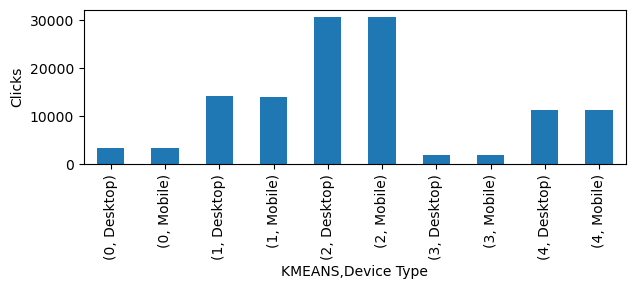

In [363]:
df_grouped = new_data.groupby(["KMEANS",'Device Type'])["Clicks"].mean()
print(df_grouped)
df_grouped.plot(kind="bar", figsize=(7,2))
plt.ylabel('Clicks')

KMEANS  Device Type
0       Desktop         991.712318
        Mobile          994.071201
1       Desktop         816.130957
        Mobile          817.047068
2       Desktop        4464.868047
        Mobile         4470.930663
3       Desktop         135.799904
        Mobile          136.990026
4       Desktop        3867.488556
        Mobile         3888.141729
Name: Revenue, dtype: float64


Text(0, 0.5, 'Revenue')

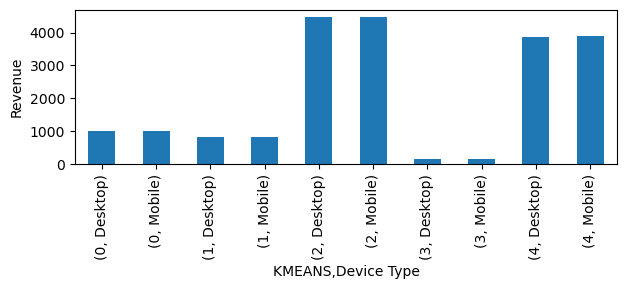

In [364]:
df_grouped1 = new_data.groupby(["KMEANS",'Device Type'])["Revenue"].mean()
print(df_grouped1)
df_grouped1.plot(kind="bar", figsize=(7,2))
plt.ylabel('Revenue')

KMEANS  Device Type
0       Desktop        1522.011083
        Mobile         1525.498431
1       Desktop        1253.277342
        Mobile         1254.604964
2       Desktop        6538.350806
        Mobile         6544.070591
3       Desktop         208.883552
        Mobile          210.709159
4       Desktop        5721.237688
        Mobile         5753.942779
Name: Spend, dtype: float64


Text(0, 0.5, 'Spend')

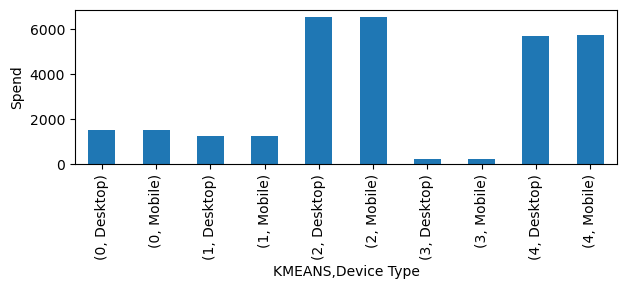

In [365]:
df_grouped2 = new_data.groupby(["KMEANS",'Device Type'])["Spend"].mean()
print(df_grouped2)
df_grouped2.plot(kind="bar", figsize=(7,2))
plt.ylabel('Spend')

KMEANS  Device Type
0       Desktop        0.056259
        Mobile         0.058174
1       Desktop        0.206214
        Mobile         0.204429
2       Desktop        0.188667
        Mobile         0.185848
3       Desktop        0.227052
        Mobile         0.227026
4       Desktop        0.034836
        Mobile         0.033795
Name: CTR, dtype: float64


Text(0, 0.5, 'CTR')

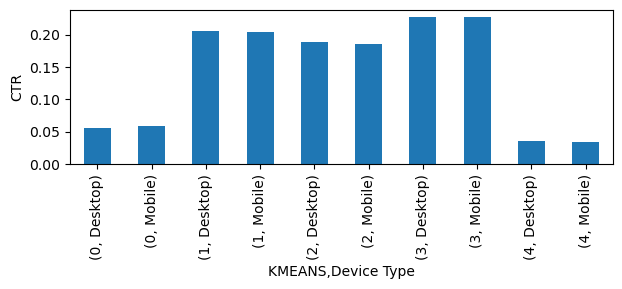

In [366]:
df_grouped3 = new_data.groupby(["KMEANS",'Device Type'])["CTR"].mean()
print(df_grouped3)
df_grouped3.plot(kind="bar", figsize=(7,2))
plt.ylabel('CTR')

KMEANS  Device Type
0       Desktop        0.532130
        Mobile         0.537950
1       Desktop        0.090368
        Mobile         0.091380
2       Desktop        0.111979
        Mobile         0.111910
3       Desktop        0.104181
        Mobile         0.104692
4       Desktop        0.742827
        Mobile         0.752804
Name: CPC, dtype: float64


Text(0, 0.5, 'CPC')

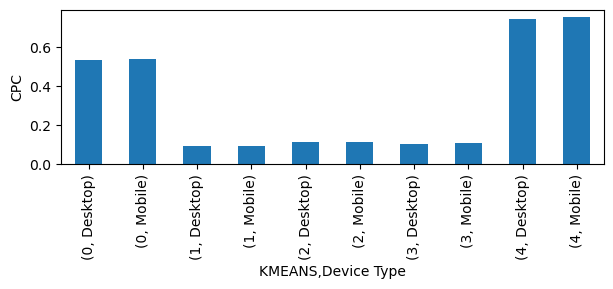

In [367]:
df_grouped4 = new_data.groupby(["KMEANS",'Device Type'])["CPC"].mean()
print(df_grouped4)
df_grouped4.plot(kind="bar", figsize=(7,2))
plt.ylabel('CPC')

KMEANS  Device Type
0       Desktop         1.810714
        Mobile          1.802921
1       Desktop        11.623212
        Mobile         11.712394
2       Desktop        15.440287
        Mobile         15.361408
3       Desktop        14.096024
        Mobile         14.085491
4       Desktop         1.560723
        Mobile          1.579737
Name: CPM, dtype: float64


Text(0, 0.5, 'CPM')

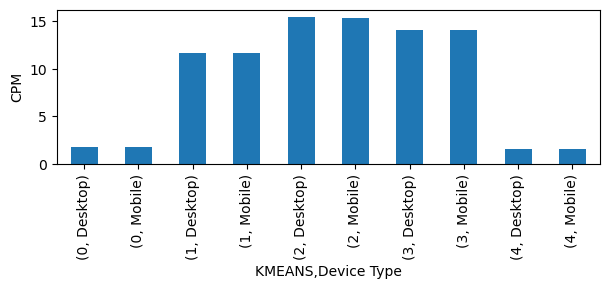

In [368]:
df_grouped5 = new_data.groupby(["KMEANS",'Device Type'])["CPM"].mean()
print(df_grouped5)
df_grouped5.plot(kind="bar", figsize=(7,2))
plt.ylabel('CPM')